In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import random 
plt.rcParams["figure.figsize"] = (15,10)

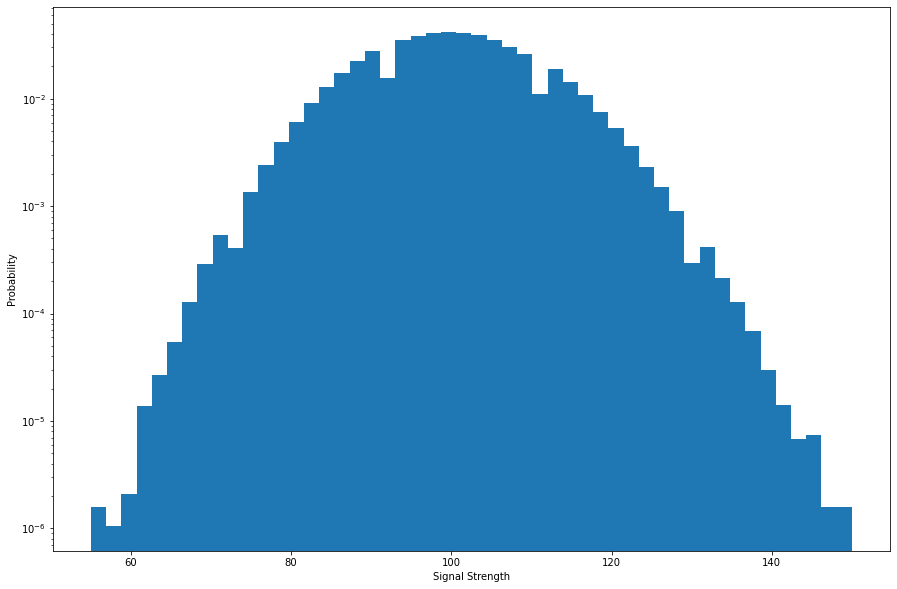

In [3]:
size = 1000000
mu = 100

bkgd = stats.poisson.rvs(mu, size = size)

plt.hist(bkgd, bins = 50, density = True)
plt.semilogy()
plt.xlabel('Signal Strength')
plt.ylabel('Probability')
plt.show()

# Problem 1

In [4]:
prob5sigma = 1/3.5e6

signal = stats.poisson.isf(prob5sigma, mu)
print(signal)

154.0


The signal would need to be 154 or greater.

# Problem 2

In [5]:
signal_strength = 200
signal = np.zeros(size)

indices = random.choices(range(0,size), k = 1000) 
for i in indices:
    signal[i] = signal_strength


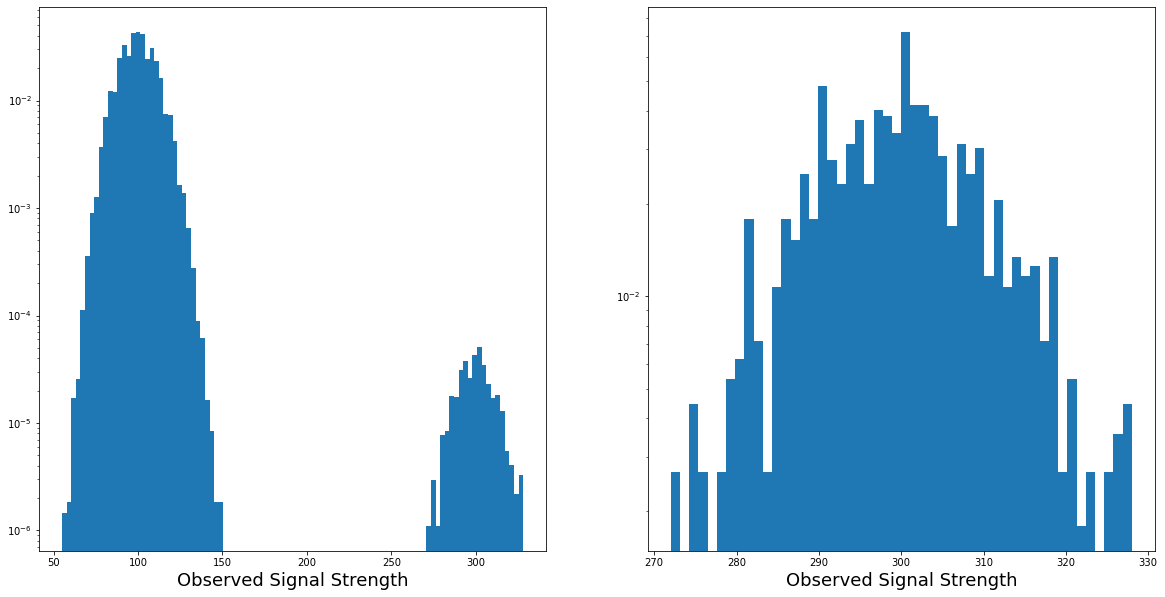

In [10]:
data = bkgd + signal
data_sig = data[data>250]

fig, ax = plt.subplots(1,2, figsize = (20,10))
ax[0].hist(data, bins = 100, density = True)
ax[0].semilogy()
ax[0].set_xlabel('Observed Signal Strength', fontsize = 18)

ax[1].hist(data_sig, bins = 50, density = True)
ax[1].semilogy()
ax[1].set_xlabel('Observed Signal Strength', fontsize = 18)

plt.show()

2a) In the left histogram there are two clusters, the larger cluster on the left is pure background. It is in the shape of a Poisson which is what we modeled the background to be. The smaller cluster on the right is signal added to background. It is also approximately in the shape of a Gaussian because the background is Poisson. Adding a constant to a Poisson is still Poisson. The right histogram is the probability density of the non-zero signal + background. 

2b) The observed signal is not biased and it is very close to symmetric because it is a Poisson with high N and that distribution looks like a Gaussian. Gaussians are symmetric around a mean so the observed signal strength is going to be very close to symmetric around 200.

# Problem 3

a) To get a range of injected signal strengths, I created a uniform distribution of signal from 0 to 300. This simulates a range of signal strengths on a Gaussian background.

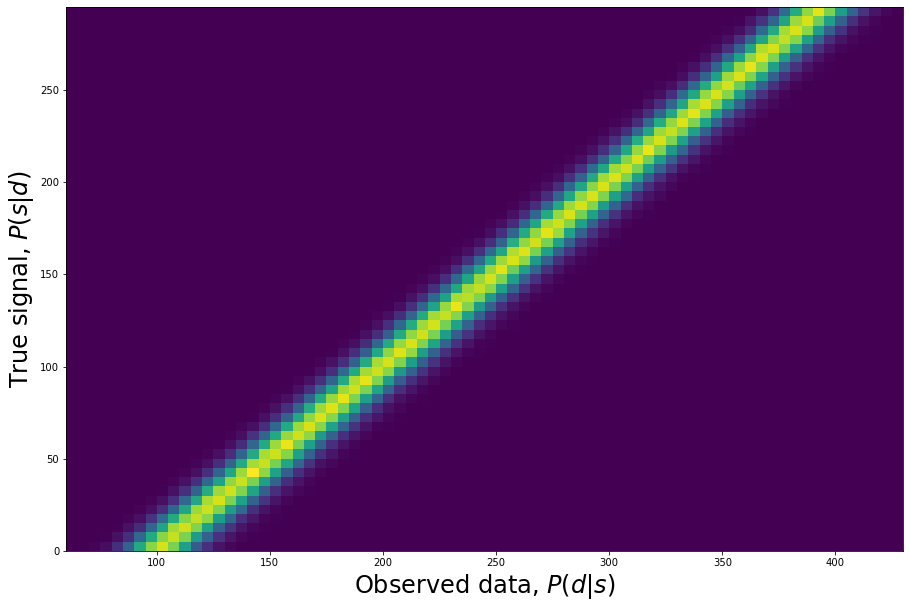

In [18]:
signal = stats.uniform.rvs(loc = 0, scale = 300, size = size)

data = signal + bkgd

signaledges = np.arange(0,300, 5)
dataedges = np.arange(60, 435, 5)
#print(signaledges, dataedges)

p, xedges, yedges, img = plt.hist2d(data, signal, bins = [dataedges, signaledges], density = True)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

plt.show()

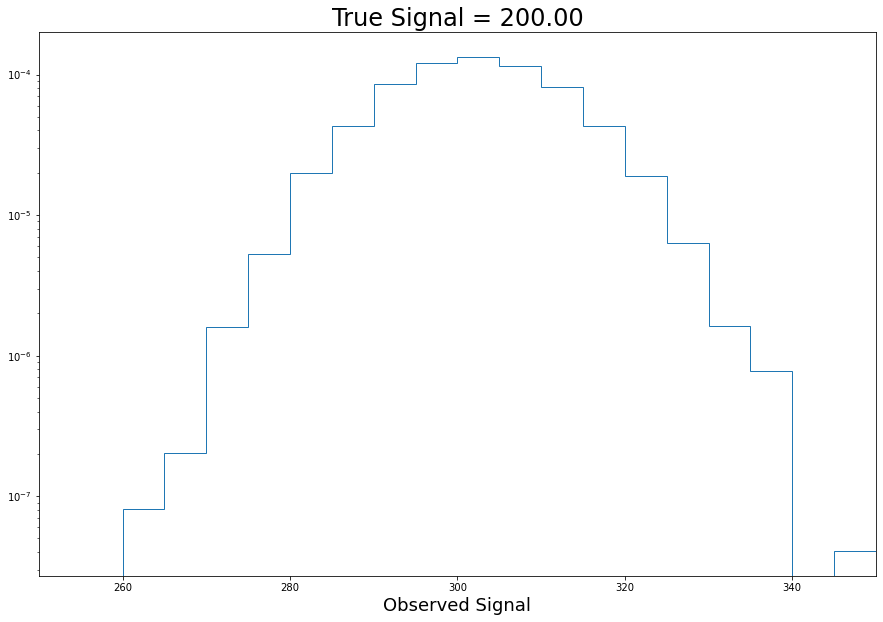

In [19]:
index = np.where(yedges == 200)[0]
#print(index)
#print(len(p0.T[index][0]))
plt.stairs(p.T[index][0], xedges)
plt.semilogy()
plt.xlim((250,350))
plt.xlabel('Observed Signal', fontsize = 18)
plt.title('True Signal = 200.00', fontsize = 24)
plt.show()

b) This is slightly different from the histogram in Problem 2b since it starts at 260 up to 350 and the previous one is between 270-330. But it still has the same over all shape and mean signal strength of 300.

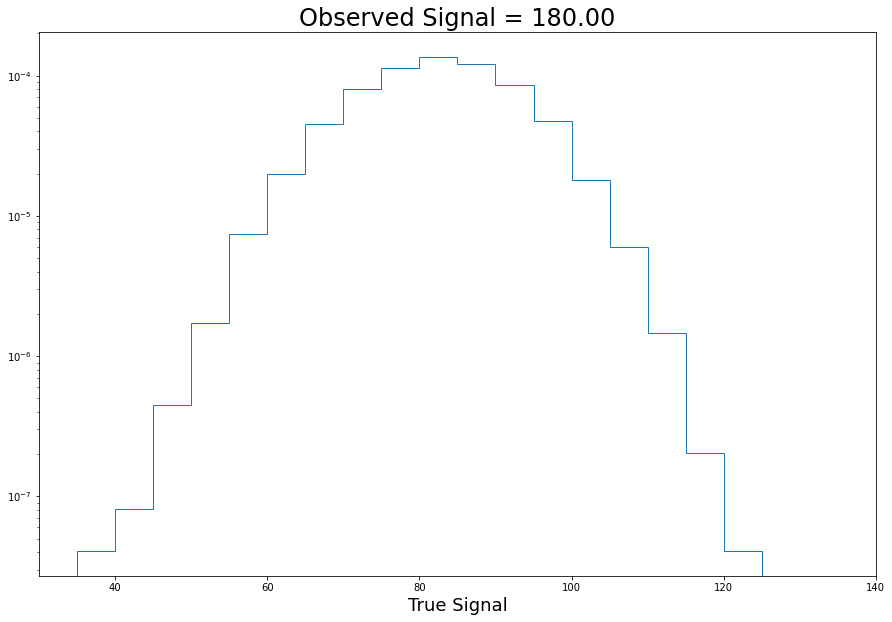

In [23]:
obs = 180 

index = np.where(xedges == obs)
plt.stairs(p[index][0], yedges)
plt.semilogy()
plt.xlim((30,140))
plt.title('Observed Signal = 180.00', fontsize = 24)
plt.xlabel('True Signal', fontsize = 18)
plt.show()

c) This histogram shows the probability of a true signal strength given an observed signal strength of 180. So the range of about 35-125 as possible signal strength and a mean of about 85.

In [44]:
mu = yedges[np.argmax(p[index][0])]
print(mu)
prob1sigma = 0.68
signal_1sigma = stats.poisson.ppf(prob1sigma,mu)
print(signal_1sigma - mu)

80
4.0


d) The 1$\sigma$ uncertainty is $80 \pm 4$

e) Yes it is symmetric and not biased to higher or lower values. This does make sense because the distribution is Poisson at high mu so it is symmetric about mu. 